In [1]:
import anndata
import scanpy as sc
import numpy as np
import pandas as pd

from matplotlib.pyplot import rc_context

In [2]:
adata = sc.read('/lmh_data/data/sclab/syn22092838/snRNA_counts.mtx')
genes = pd.read_csv('/lmh_data/data/sclab/syn22092838/genes.csv', header=None)
scRNA_metadata = pd.read_csv('/lmh_data/data/sclab/syn22092838/snRNA_metadta.csv', index_col=0)

adata.obs_names = genes.values.reshape(-1)
adata.var = scRNA_metadata
adata = adata.T

adata = adata[adata.obs[adata.obs['celltype'].isin(['ASC'])].index,:]
# adata.obs.celltype = adata.obs.celltype.cat.rename_categories({'ASC': 'Astro'})
adata

View of AnnData object with n_obs × n_vars = 4756 × 36114
    obs: 'Sample.ID', 'Batch', 'Sex', 'Age', 'Diagnosis', 'UMAP_1', 'UMAP_2', 'cluster', 'celltype'

In [3]:
train_set = np.load('/lmh_data/data/sclab/sclab/train_dataset.npy', allow_pickle=True)
scRNA_head = train_set[0]['scRNA_head']

In [4]:
gene_names = set(scRNA_head) & set(adata.var_names)
np.save('/lmh_data/data/sclab/sclab/AD/filter_genes.npy', np.array(gene_names))

In [5]:
rna = anndata.read_h5ad("/lmh_data/data/sclab/Human_M1_10x/scRNA.h5ad")
rna.obs.cell_type = rna.obs.cell_type.cat.rename_categories({'Oligo': 'ODC'})
rna = rna[rna.obs['cell_type'].isin(['Astro']),:]
rna

View of AnnData object with n_obs × n_vars = 568 × 50281
    obs: 'cell_type', 'domain'

In [6]:
_rna = rna[:, list(gene_names)].copy()
_adata = adata[:, list(gene_names)].copy()
# _adata = _adata[_adata.obs[_adata.obs['Diagnosis'] == 'Control'].index, :]

_adata.obs.loc[:, 'cell_type'] = _adata.obs.celltype
_rna.obs.loc[:, 'Diagnosis'] = 'Control'
_rna.obs.loc[:, 'category'] = 'control'
_adata.obs.loc[:, 'category'] = 'AD'

In [7]:
import scanorama
_combine = scanorama.correct_scanpy([_rna, _adata], return_dimred=True)
_combine

Found 20144 genes among all datasets
[[0.         0.81161972]
 [0.         0.        ]]
Processing datasets (0, 1)


/root/miniconda3/envs/scalex/lib/python3.8/site-packages/scanorama/scanorama.py:237: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(datasets[i])


[AnnData object with n_obs × n_vars = 568 × 20144
     obs: 'cell_type', 'domain', 'Diagnosis', 'category'
     obsm: 'X_scanorama',
 AnnData object with n_obs × n_vars = 4756 × 20144
     obs: 'Sample.ID', 'Batch', 'Sex', 'Age', 'Diagnosis', 'UMAP_1', 'UMAP_2', 'cluster', 'celltype', 'cell_type', 'category'
     obsm: 'X_scanorama']

In [8]:
_test = anndata.concat(_combine)
sc.pp.neighbors(_test, metric = "cosine", use_rep = "X_scanorama")

/root/miniconda3/envs/scalex/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/root/miniconda3/envs/scalex/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/root/miniconda3/envs/scalex/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/root/miniconda3/envs/scalex/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/root/miniconda3/envs/scalex/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/root/miniconda3/envs/scalex/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' wi

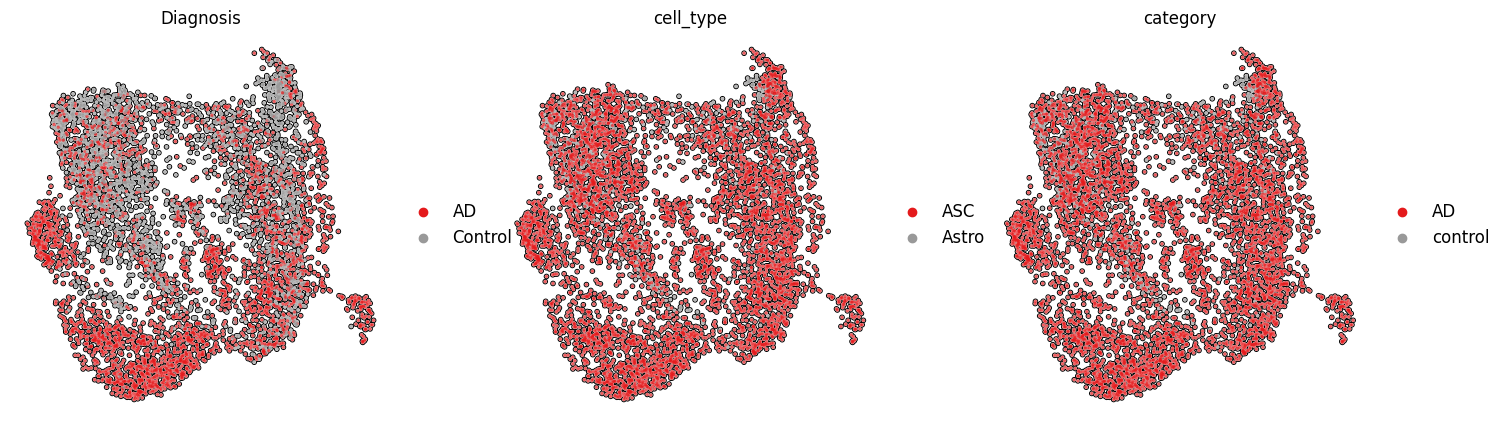

In [9]:
sc.tl.umap(_test)
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(_test, color=['Diagnosis', 'cell_type', 'category'], add_outline=True,
#                legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2, frameon=False, palette='Set1')

/root/miniconda3/envs/scalex/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/root/miniconda3/envs/scalex/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/root/miniconda3/envs/scalex/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/root/miniconda3/envs/scalex/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/root/miniconda3/envs/scalex/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' wi

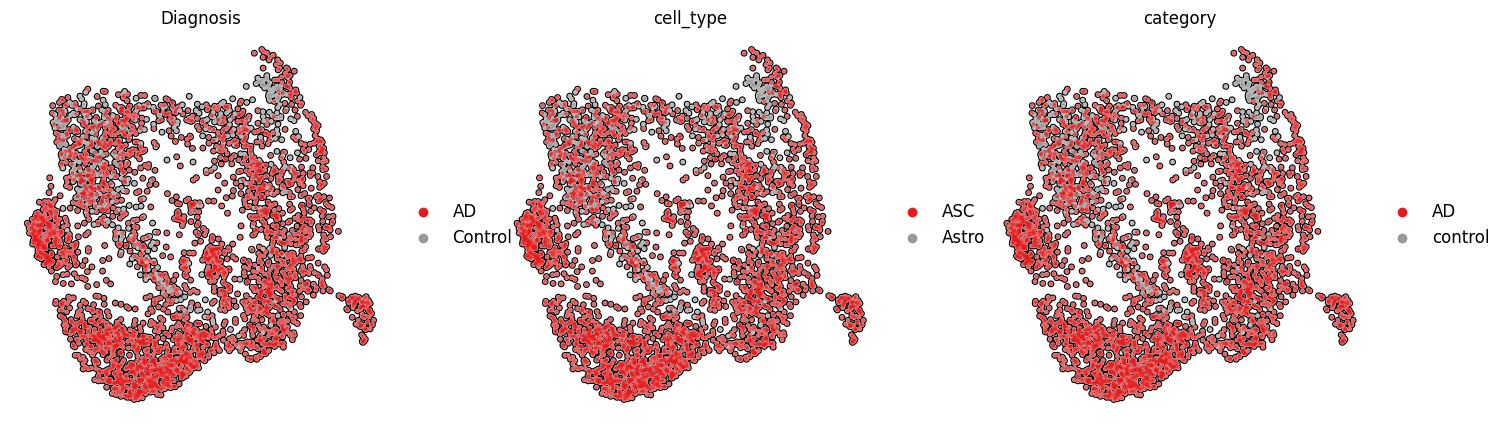

In [10]:
_tmp = _test.copy()
_tmp = _tmp[(_tmp.obs['cell_type'].isin(['Astro', 'ASC']))&
            ((_tmp.obs['category']=='control')|(_tmp.obs['Diagnosis']=='AD')), :]
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(_tmp, color=['Diagnosis', 'cell_type', 'category'], add_outline=True,
               legend_fontsize=12, legend_fontoutline=2, frameon=False)

In [11]:
from sklearn.metrics.pairwise import cosine_distances

distances = 1 - cosine_distances(
    _combine[1].obsm["X_scanorama"],
    _combine[0].obsm["X_scanorama"],
)

def label_transfer(dist, labels):
    lab = pd.get_dummies(labels).to_numpy().T
    class_prob = lab @ dist
    norm = np.linalg.norm(class_prob, 2, axis=0)
    class_prob = class_prob / norm
    class_prob = (class_prob.T - class_prob.min(1)) / class_prob.ptp(1)
    return class_prob

class_prob = label_transfer(distances, _combine[1].obs.Diagnosis)
cp_df = pd.DataFrame(class_prob, columns=np.sort(_combine[1].obs.Diagnosis.unique()))
cp_df.index = _combine[0].obs.index
cp_df

,AD,Control
sample_name,,
AAGACTCAGGGAACAA-LKTX_190129_01_A01,0.999694,0.473829
ACCCAAACAAGAGGCT-LKTX_190129_01_A01,0.984883,0.615693
AGTACTGCAGATGCGA-LKTX_190129_01_A01,0.999942,0.499328
ATCGATGTCTGCGATA-LKTX_190129_01_A01,0.258183,0.936660
ATTTCACTCCGTGTGG-LKTX_190129_01_A01,0.999451,0.515432
...,...,...
TGTTCTAGTAGTGATA-LKTX_190130_01_H01,0.003447,0.551340
TTACAGGAGGAACATT-LKTX_190130_01_H01,0.000883,0.522067
TTCAGGATCGTGGGTC-LKTX_190130_01_H01,0.260753,0.938094


In [18]:
cp_df['Control-AD'] = cp_df['Control'] - cp_df['AD']
AD_index = cp_df.sort_values('Control-AD', ascending=True, inplace=False)[:20].index
control_index = cp_df.sort_values('Control-AD', ascending=False, inplace=False)[:20].index

In [12]:
_index = cp_df[cp_df['AD']>cp_df['Control']*2].index
AD_index = _combine[0][_index, :].obs_names

_index = cp_df[cp_df['Control']>cp_df['AD']*2].index
control_index = _combine[0][_index, :].obs_names

In [19]:
train_rna = anndata.read_h5ad("/lmh_data/data/sclab/sclab/rna_result.h5ad")

_dataset = []
def get_dataset(_indexs, Diagnosis):
    for _index in _indexs:
#         _case = _rna[_index, list(gene_names)]
        _case = rna[_index, train_rna.var_names]
        _dataset.append({
            'scRNA': _case.X.toarray()[0].astype(np.int32),
            'scRNA_head': _case.var_names,
            'cell_type': _case.obs['cell_type'].values[0],
            'Diagnosis': Diagnosis,
        })
get_dataset(AD_index, 'AD')
get_dataset(control_index, 'control')
np.save('/lmh_data/data/sclab/sclab/AD/eval_dataset.npy', _dataset)